In [13]:
%load_ext autoreload
%autoreload 2
import numpy as np
import configparser
from src.clustering.algorithm_wrappers.KMeansWrapper import KMeansWrapper
from src.clustering.algorithm_wrappers.AgglomerativeWrapper import AgglomorativeWrapper
import umap
import matplotlib.pyplot as plt

In [2]:
config = configparser.ConfigParser()
config.read('../../config.ini')
embedding_path = '../../' + config['DATA']['UserEmbeddingPath']
test_path = '../../' + config['DATA']['TestUserEmbeddingPath']

In [3]:
def draw_umap(data, n_components=2, title=''):
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(data[:,0], range(len(data)))
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(data[:,0], data[:,1], s=1)
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(data[:,0], data[:,1], data[:,2], s=1)
    plt.title(title, fontsize=18)

## Load embeddings

In [4]:
user_embedding = np.load(embedding_path)
test_embedding = np.load(test_path)

## Dimensionality Reduction

In [5]:
N_NEIGHBORS= int(config['UMAP']['n_neighbors'])
MIN_DIST= float(config['UMAP']['min_dist'])
N_COMPONENTS= int(config['UMAP']['n_components'])
METRIC=config['UMAP']['metric']

In [6]:
fit = umap.UMAP(
    n_neighbors= N_NEIGHBORS,
    min_dist= MIN_DIST,
    n_components= N_COMPONENTS,
    metric=METRIC
)
user_reduced = fit.fit_transform(user_embedding)
test_reduced = fit.transform(test_embedding)

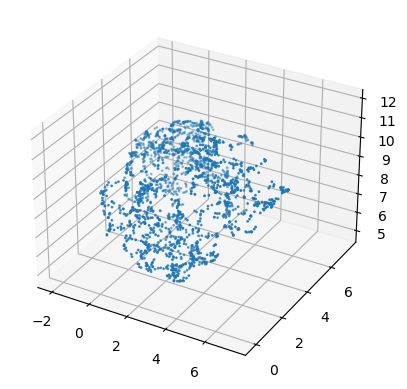

In [7]:
draw_umap(user_reduced, N_COMPONENTS)

## Train clustering model and find represantant

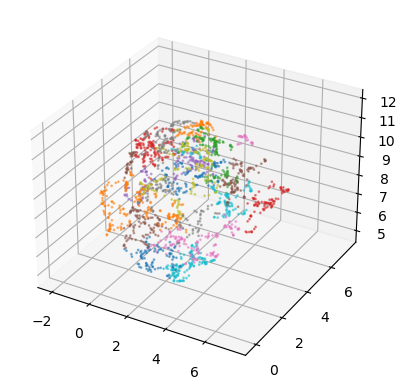

In [8]:
kmeans_model = KMeansWrapper()
kmeans_model.train(user_reduced)
kmeans_model.extract_representations() # return tuple (clusterid, location)
kmeans_model.visualize(user_reduced)

## Predict user cluster

You are labeled as cluster 9
Your representant lies at [1.806136  4.1629515 9.765736 ]


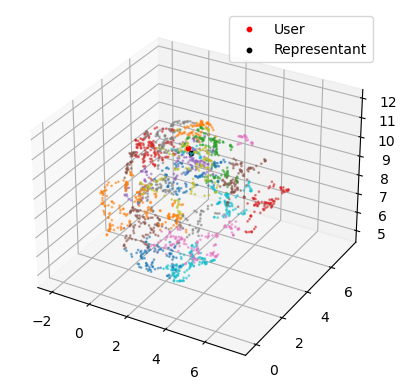

In [9]:
prediction = kmeans_model.predict(test_reduced[0])
print(f"You are labeled as cluster {prediction[0]}")

cluster_representant = kmeans_model.interpret(prediction)
print(f"Your representant lies at {cluster_representant}")
kmeans_model.visualize(user_reduced, test_reduced[0], cluster_representant)

## Suggest alternative

Would you like to see a user from 13


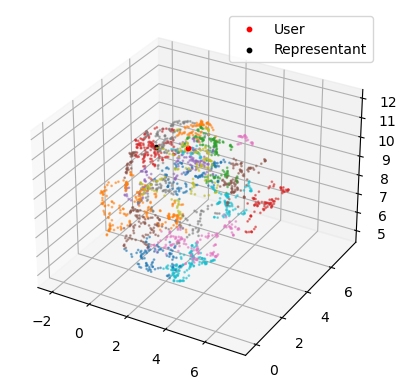

In [21]:
suggestion_label, suggestion_location = kmeans_model.suggest(cluster_representant)
print(f"Would you like to see a user from {suggestion_label}")
kmeans_model.visualize(user_reduced, test_reduced[0], suggestion_location)


# Agglomorative

You are labeled as cluster 9
Your representant lies at [3.6096818 4.0916853 7.9432487]
Would you like to see a user from 0


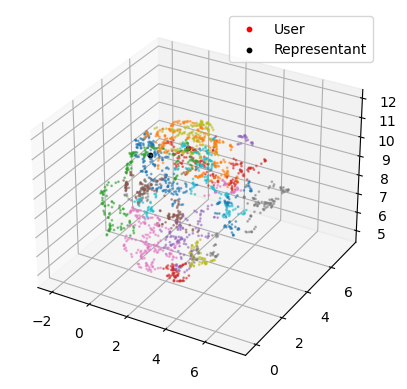

In [20]:
agglomorative = AgglomorativeWrapper()
agglomorative.extract_representations(user_reduced)  # return tuple (clusterid, location)
prediction = kmeans_model.predict(test_reduced[0])
print(f"You are labeled as cluster {prediction[0]}")

cluster_representant = agglomorative.interpret(prediction)
print(f"Your representant lies at {cluster_representant}")
user_suggestion = agglomorative.suggest(cluster_representant)
print(f"Would you like to see a user from {user_suggestion[0]}")
agglomorative.visualize(user_reduced, test_reduced[0], user_suggestion[1])
